In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
drivers = pd.read_csv('dataset/driver_dataset.csv', sep='\t')
drivers.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [4]:
drivers.shape

(4000, 3)

In [5]:
drivers = drivers.sample(frac=1)

In [6]:
drivers.drop('Driver_ID', axis=1, inplace=True)
drivers.sample(10)

,Distance_Feature,Speeding_Feature
2749,50.67,4.0
2669,64.48,5.0
267,66.16,32.0
3229,164.03,86.0
3966,159.89,17.0
3240,140.32,56.0
2948,42.32,6.0
3660,211.26,6.0
1681,42.73,5.0
678,50.20,5.0


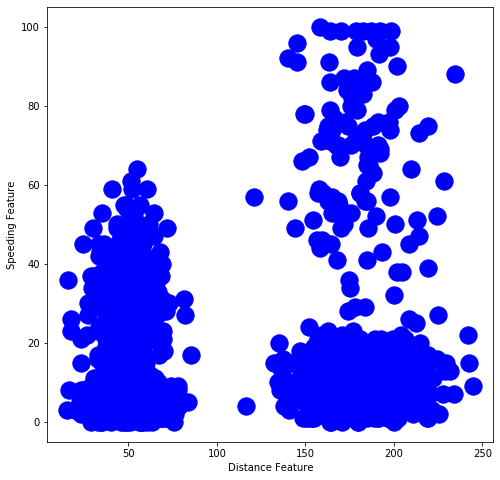

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

plt.scatter(drivers['Distance_Feature'],
           drivers['Speeding_Feature'],
           s=300,
           c='blue')
plt.xlabel('Distance Feature')
plt.ylabel('Speeding Feature')

plt.show()

In [8]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=4, max_iter=1000,).fit(drivers)

In [9]:
kmeans_model.labels_[::40]

array([0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 3, 0, 0, 1, 0, 1, 3, 0, 0, 3,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 1, 0, 3, 0, 3, 0, 1, 1])

In [11]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3])

In [12]:
zipped_list = list(zip(np.array(drivers), kmeans_model.labels_))
zipped_list[1000:1010]

[(array([42.32,  5.  ]), 0),
 (array([50.14,  3.  ]), 0),
 (array([49.85,  8.  ]), 0),
 (array([45.62, 25.  ]), 3),
 (array([37.66,  2.  ]), 0),
 (array([45.82, 42.  ]), 3),
 (array([51.78,  2.  ]), 0),
 (array([50.82,  6.  ]), 0),
 (array([41.65,  7.  ]), 0),
 (array([203.41,   7.  ]), 1)]

In [13]:
centroids = kmeans_model.cluster_centers_
centroids

array([[ 49.98428468,   5.21441441],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154],
       [ 50.46127059,  32.42823529]])

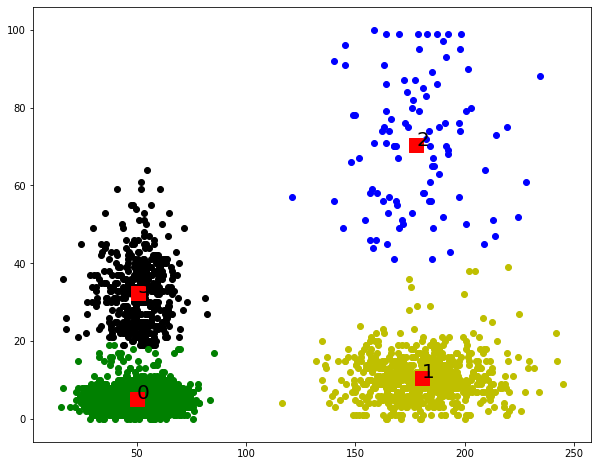

In [17]:
colors = ['g', 'y', 'b', 'k']

plt.figure(figsize=(10,8))

for element in zipped_list:
    plt.scatter(element[0][0], element[0][1],
                c=colors[(element[1] % len(colors))])
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize=20)

#### Note ont he evaluation of the model

How similar an object is compared with other objects in its own cluster (cohesion) and how different it is from objects in other clusters (seperation)

In [18]:
from sklearn.metrics import silhouette_score

print("Silhouette Score : ", silhouette_score(drivers, kmeans_model.labels_))

Silhouette Score :  0.5911323766293183


In [19]:
kmeans_model = KMeans(n_clusters=3, max_iter=1000,).fit(drivers)

In [20]:
kmeans_model.labels_[::40]

array([1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0])

In [21]:
zipped_list = list(zip(np.array(drivers), kmeans_model.labels_))
zipped_list[1000:1010]

[(array([42.32,  5.  ]), 1),
 (array([50.14,  3.  ]), 1),
 (array([49.85,  8.  ]), 1),
 (array([45.62, 25.  ]), 1),
 (array([37.66,  2.  ]), 1),
 (array([45.82, 42.  ]), 1),
 (array([51.78,  2.  ]), 1),
 (array([50.82,  6.  ]), 1),
 (array([41.65,  7.  ]), 1),
 (array([203.41,   7.  ]), 0)]

In [22]:
centroids = kmeans_model.cluster_centers_
centroids

array([[180.34311782,  10.52011494],
       [ 50.04763437,   8.82875   ],
       [177.83509615,  70.28846154]])

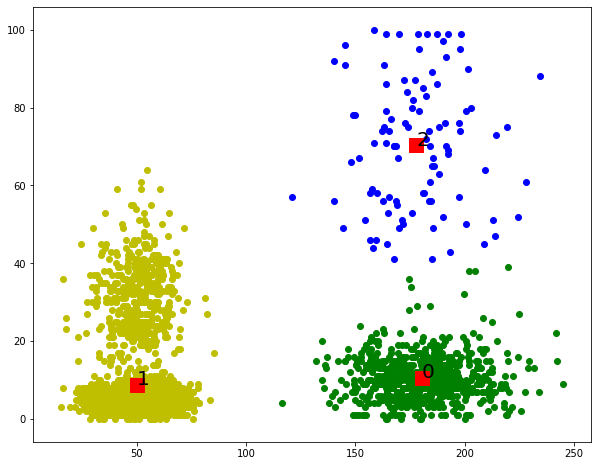

In [23]:
colors = ['g', 'y', 'b', 'k']

plt.figure(figsize=(10,8))

for element in zipped_list:
    plt.scatter(element[0][0], element[0][1],
                c=colors[(element[1] % len(colors))])
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize=20)

In [24]:
print("Silhouette Score : ", silhouette_score(drivers, kmeans_model.labels_))

Silhouette Score :  0.8231396834167265


In [25]:
kmeans_model = KMeans(n_clusters=2, max_iter=1000,).fit(drivers)

In [26]:
kmeans_model.labels_[::40]

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0])

In [27]:
np.unique(kmeans_model.labels_)

array([0, 1])

In [28]:
zipped_list = list(zip(np.array(drivers), kmeans_model.labels_))
zipped_list[1000:1010]

[(array([42.32,  5.  ]), 1),
 (array([50.14,  3.  ]), 1),
 (array([49.85,  8.  ]), 1),
 (array([45.62, 25.  ]), 1),
 (array([37.66,  2.  ]), 1),
 (array([45.82, 42.  ]), 1),
 (array([51.78,  2.  ]), 1),
 (array([50.82,  6.  ]), 1),
 (array([41.65,  7.  ]), 1),
 (array([203.41,   7.  ]), 0)]

In [29]:
centroids = kmeans_model.cluster_centers_
centroids

array([[180.017075  ,  18.29      ],
       [ 50.04763437,   8.82875   ]])

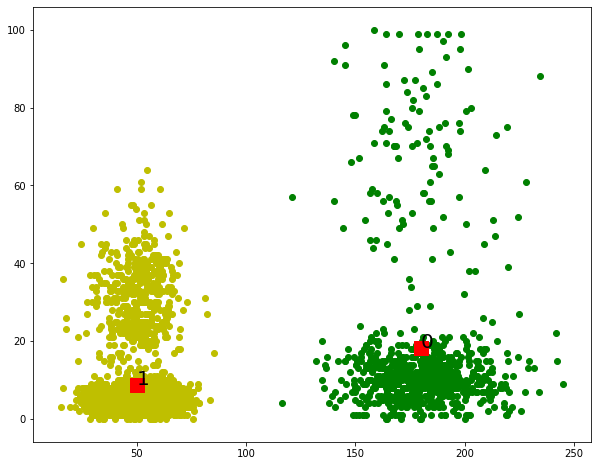

In [30]:
colors = ['g', 'y', 'b', 'k']

plt.figure(figsize=(10,8))

for element in zipped_list:
    plt.scatter(element[0][0], element[0][1],
                c=colors[(element[1] % len(colors))])
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize=20)

In [31]:
print("Silhouette Score : ", silhouette_score(drivers, kmeans_model.labels_))

Silhouette Score :  0.8490223286225531
